In [1]:
import sklearn #for machine learning in python
import pandas as pd #python data analysis library
import numpy as np #for various numerical operations
import re #used to work with Regular Expressions.
import matplotlib.pyplot as plt #used for plotting and visualising the data
import seaborn as sns #used for statistical data visualisation
import string
import nltk #for natural language processing
import warnings #to alert the user of some condition
warnings.filterwarnings("ignore",category=DeprecationWarning) #to ignore any deprecation warnings that may arise.
%matplotlib inline 

In [2]:
data = pd.read_csv("movie review.csv") #reading the data into a pandas dataframe
data

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


ENCODING LABELS: EACH LABEL IS AN INTEGER VALUE OF EITHER 0 OR 1.
WHERE 0 REPRESENTS A NEGATIVE REVIEW AND 1 REPRESENTS A POSITIVE REVIEW.

In [3]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
data["sentiment"] = label_encoder.fit_transform(data["sentiment"])
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [4]:
print(label_encoder.classes_)

['negative' 'positive']


In [5]:
data["review"] = data["review"].str.lower()
data.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,1
1,a wonderful little production. <br /><br />the...,1
2,i thought this was a wonderful way to spend ti...,1
3,basically there's a family where a little boy ...,0
4,"petter mattei's ""love in the time of money"" is...",1


REPLACING EVERYTHING EXCEPT CHARACTERS WITH SPACES

In [6]:
data["clean review"] = data["review"].str.replace("[^a-z]"," ")
data.head(10)

,review,sentiment,clean review
0,one of the other reviewers has mentioned that ...,1,one of the other reviewers has mentioned that ...
1,a wonderful little production. <br /><br />the...,1,a wonderful little production br br the...
2,i thought this was a wonderful way to spend ti...,1,i thought this was a wonderful way to spend ti...
3,basically there's a family where a little boy ...,0,basically there s a family where a little boy ...
4,"petter mattei's ""love in the time of money"" is...",1,petter mattei s love in the time of money is...
5,"probably my all-time favorite movie, a story o...",1,probably my all time favorite movie a story o...
6,i sure would like to see a resurrection of a u...,1,i sure would like to see a resurrection of a u...
7,"this show was an amazing, fresh & innovative i...",0,this show was an amazing fresh innovative i...
8,encouraged by the positive comments about this...,0,encouraged by the positive comments about this...
9,if you like original gut wrenching laughter yo...,1,if you like original gut wrenching laughter yo...


REMOVING STOP WORDS LIKE “hmm”, “and”, “oh” AS THEY ARE OF VERY LITTLE USE.

In [7]:
data['clean review'] = data['clean review'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
data.head(10)

,review,sentiment,clean review
0,one of the other reviewers has mentioned that ...,1,other reviewers mentioned that after watching ...
1,a wonderful little production. <br /><br />the...,1,wonderful little production filming technique ...
2,i thought this was a wonderful way to spend ti...,1,thought this wonderful spend time summer weeke...
3,basically there's a family where a little boy ...,0,basically there family where little jake think...
4,"petter mattei's ""love in the time of money"" is...",1,petter mattei love time money visually stunnin...
5,"probably my all-time favorite movie, a story o...",1,probably time favorite movie story selflessnes...
6,i sure would like to see a resurrection of a u...,1,sure would like resurrection dated seahunt ser...
7,"this show was an amazing, fresh & innovative i...",0,this show amazing fresh innovative idea when f...
8,encouraged by the positive comments about this...,0,encouraged positive comments about this film h...
9,if you like original gut wrenching laughter yo...,1,like original wrenching laughter will like thi...


TOKENIZATION

TOKENS ARE INDIVIDUAL WORDS AND TOKENIZATION IS THE PROCESS OF SPLITTING A STRING OF TEXT INTO TOKENS.

In [8]:
tokenized_review = data["clean review"].apply(lambda x:x.split())
tokenized_review

0        [other, reviewers, mentioned, that, after, wat...
1        [wonderful, little, production, filming, techn...
2        [thought, this, wonderful, spend, time, summer...
3        [basically, there, family, where, little, jake...
4        [petter, mattei, love, time, money, visually, ...
                               ...                        
49995    [thought, this, movie, down, right, good, wasn...
49996    [plot, dialogue, acting, idiotic, directing, a...
49997    [catholic, taught, parochial, elementary, scho...
49998    [going, have, disagree, with, previous, commen...
49999    [expects, star, trek, movies, high, fans, expe...
Name: clean review, Length: 50000, dtype: object

STEMMING

STEMMING IS A PROCESS WHERE WORDS ARE REDUCED TO A ROOT BY REMOVING THE SUFFIXES (“ing”, “ly”, “es”, “s” etc) FROM A WORD.
FOR EXAMPLE — “play”, “player”, “played”, “plays” and “playing” ARE DIFFERENT VARIATIONS OF THE WORD — “play”

In [9]:
from nltk import PorterStemmer
ps = PorterStemmer()
tokenized_review = tokenized_review.apply(lambda x: [ps.stem(i) for i in x])
tokenized_review.head()

0    [other, review, mention, that, after, watch, j...
1    [wonder, littl, product, film, techniqu, veri,...
2    [thought, thi, wonder, spend, time, summer, we...
3    [basic, there, famili, where, littl, jake, thi...
4    [petter, mattei, love, time, money, visual, st...
Name: clean review, dtype: object

NOW LET'S JOIN THESE TOKENS BACK TOGETHER

In [10]:
for i in range(len(tokenized_review)):
    tokenized_review[i] = ' '.join(tokenized_review[i])
data["clean review"] = tokenized_review
data.head(10)

,review,sentiment,clean review
0,one of the other reviewers has mentioned that ...,1,other review mention that after watch just epi...
1,a wonderful little production. <br /><br />the...,1,wonder littl product film techniqu veri unassu...
2,i thought this was a wonderful way to spend ti...,1,thought thi wonder spend time summer weekend s...
3,basically there's a family where a little boy ...,0,basic there famili where littl jake think ther...
4,"petter mattei's ""love in the time of money"" is...",1,petter mattei love time money visual stun film...
5,"probably my all-time favorite movie, a story o...",1,probabl time favorit movi stori selfless sacri...
6,i sure would like to see a resurrection of a u...,1,sure would like resurrect date seahunt seri wi...
7,"this show was an amazing, fresh & innovative i...",0,thi show amaz fresh innov idea when first air ...
8,encouraged by the positive comments about this...,0,encourag posit comment about thi film here loo...
9,if you like original gut wrenching laughter yo...,1,like origin wrench laughter will like thi movi...


DATA VISUALISATION

TO GIVE US AN APPROXIMATE IDEA OF WHAT OUR DATA LOOKS LIKE

A WORLD CLOUD IS A VISUALISATION WHEREIN THE MOST FREQUENT WORDS APPEAR IN LARGE SIZE AND LESS FREQUENT WORDS APPEAR IN SMALLER SIZE.

In [11]:
from wordcloud import WordCloud,ImageColorGenerator
from PIL import Image
import urllib
import requests

COMBINING ALL POSITIVE REVIEWS TOGETHER TO GET ALL WORDS WHICH INDICATE POSITIVITY IN A REVIEW

In [12]:
positive = ' '.join(text for text in data["clean review"][data["sentiment"]==1])

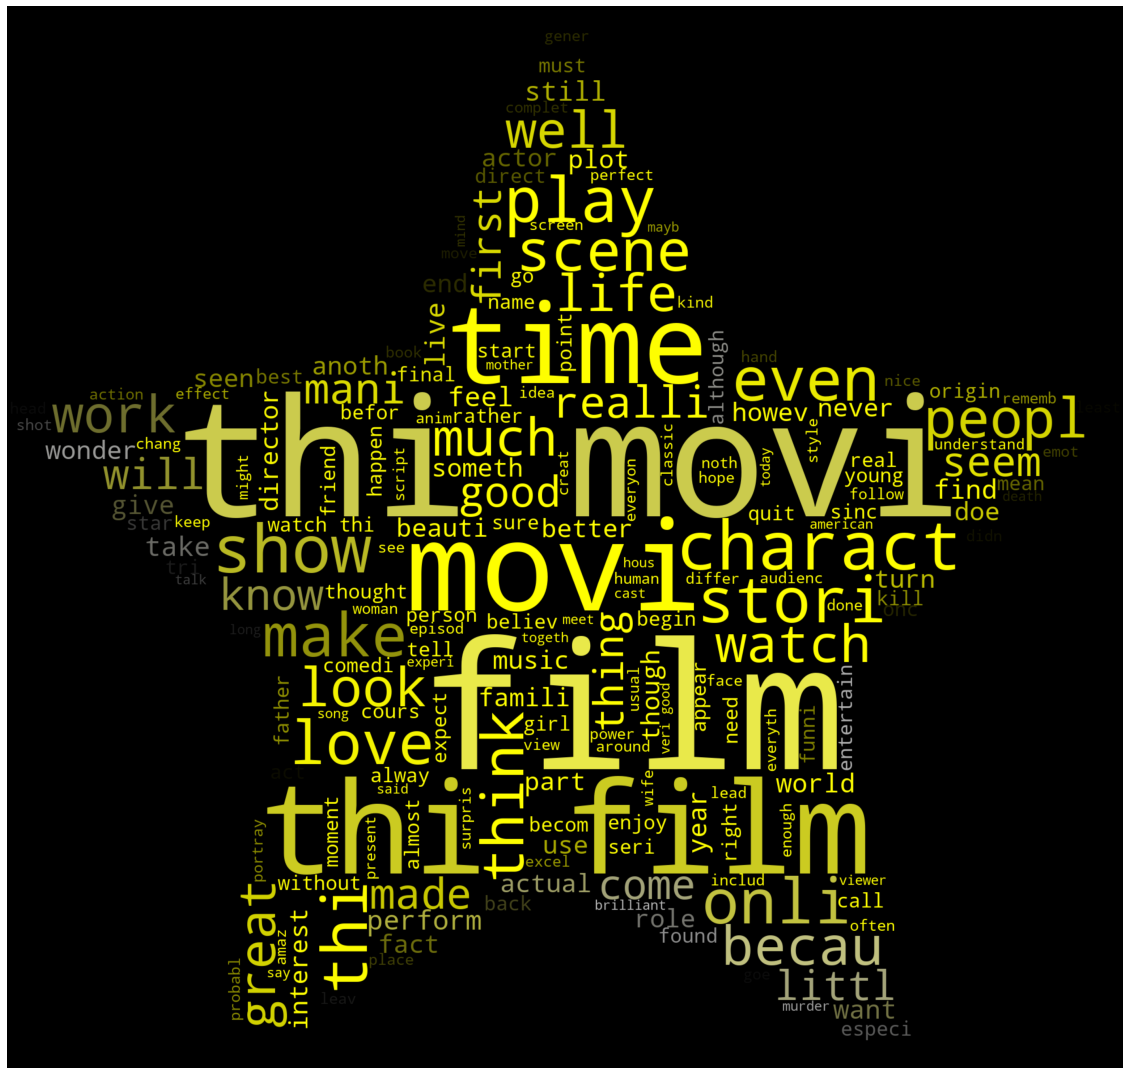

In [13]:
#generating an image to be used as a mask onto the wordcloud
Mask = np.array(Image.open(requests.get('http://clipart-library.com/image_gallery/211.png', stream=True).raw)) 

# We use the ImageColorGenerator library from Wordcloud 
# to take the color of the image and impose it over our wordcloud
image_colors = ImageColorGenerator(Mask)

# Now we use the WordCloud function from the wordcloud library 
# which takes in our text and our mask to generate a custom wordcloud.
wc = WordCloud(background_color='black', height=2000, width=4000,mask=Mask).generate(positive)

# Size of the image generated 
plt.figure(figsize=(20,20))

# Here we recolor the words from the dataset to the image's color
# recolor just recolors the default colors to the image's yellow color
# interpolation is used to smooth the image generated 
plt.imshow(wc.recolor(color_func=image_colors),interpolation="hamming")

plt.axis('off')
plt.show()

NOW IN THE SAME WAY COMBINING ALL NEGATIVE REVIEWS TOGETHER TO GET ALL WORDS WHICH INDICATE NEGATIVITY IN A REVIEW

In [14]:
negative = ' '.join(text for text in data["clean review"][data["sentiment"]==0])

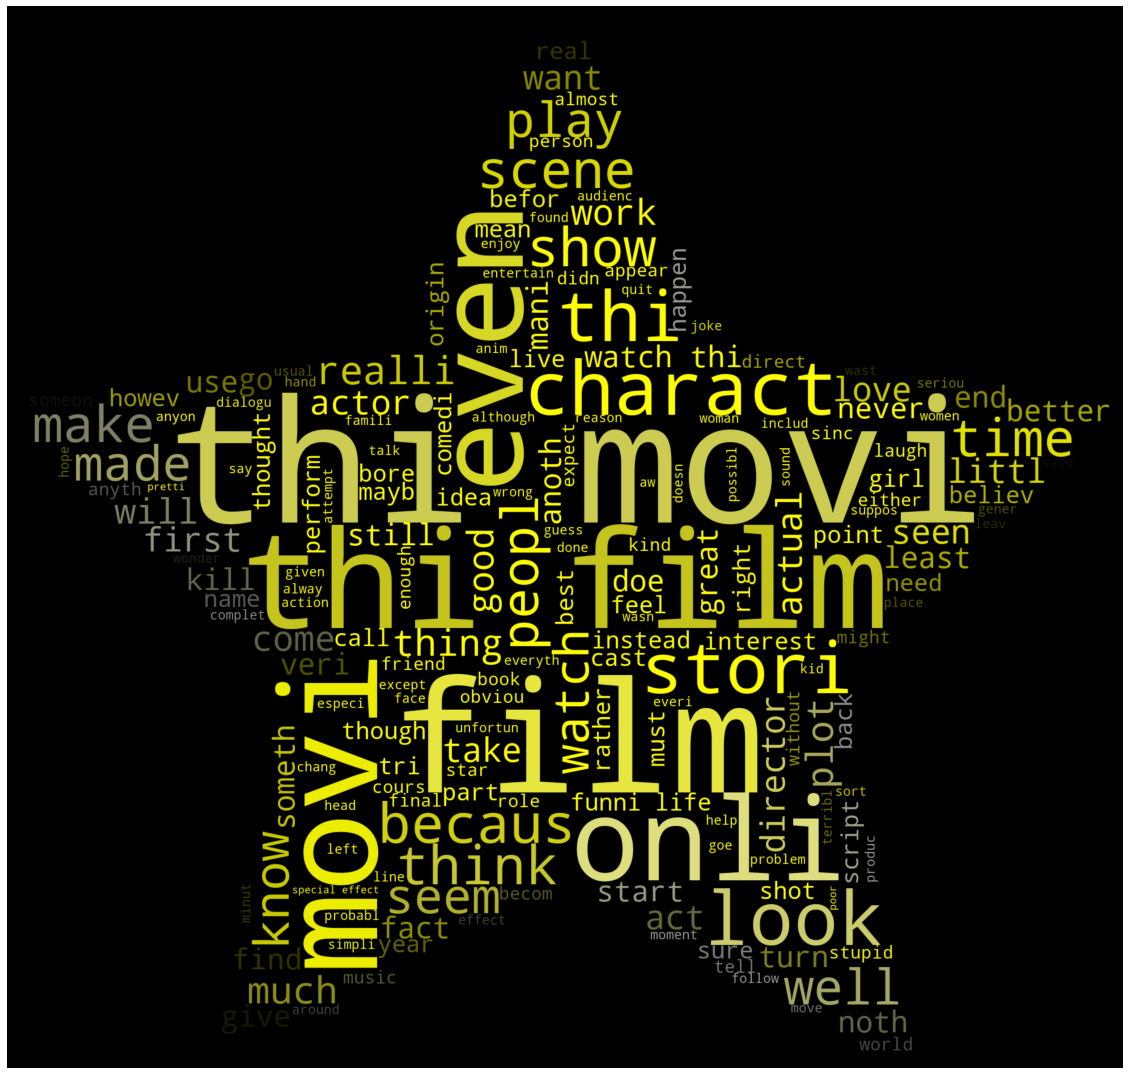

In [15]:
#generating an image to be used as a mask onto the wordcloud
Mask = np.array(Image.open(requests.get('http://clipart-library.com/image_gallery/211.png',stream=True).raw))

# We use the ImageColorGenerator library from Wordcloud 
# to take the color of the image and impose it over our wordcloud
image_colors = ImageColorGenerator(Mask)

# Now we use the WordCloud function from the wordcloud library 
# which takes in our text and our mask to generate a custom wordcloud.
wc = WordCloud(background_color = 'black',height = 2000,width = 4000,mask = Mask).generate(negative)

# Size of the image generated 
plt.figure(figsize=(20,20))

# Here we recolor the words from the dataset to the image's color
# recolor just recolors the default colors to the image's yellow color
# interpolation is used to smooth the image generated
plt.imshow(wc.recolor(color_func = image_colors),interpolation = "hamming")
plt.axis("off")
plt.show()

NOW EXTRACTING FEATURES FROM OUR TEXTUAL DATA USING BAG OF WORDS WHICH DESCRIBES THE OCCURENCE OF EACH UNIQUE WORD WITHIN A DOCUMENT.

In [16]:
from sklearn.feature_extraction.text import CountVectorizer #Convert a collection of text documents to a matrix of token counts

# Here we will count and store the frequency of occurence of each unique word in a document in a form of matrix
bow_vectorizer = CountVectorizer(max_df=0.90,min_df=2,max_features=2000)
bow = bow_vectorizer.fit_transform(data["clean review"])
bow

<50000x2000 sparse matrix of type '<class 'numpy.int64'>'
	with 3938754 stored elements in Compressed Sparse Row format>

In [17]:
df_bow = pd.DataFrame(bow.todense()) #seeing how our data now looks in dense matrix form in a dataframe
df_bow

,0,1,2,3,4,5,6,7,8,9,...,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
4,0,0,0,2,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,3,0,0,0
49996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
49998,0,0,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
train_bow = bow
train_bow.todense() #representing in the form of dense matrix

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

SPLITTING DATA INTO TRAIN AND TEST SETS

In [19]:
from sklearn.model_selection import train_test_split
x_train_bow,x_test_bow,y_train_bow,y_test_bow = train_test_split(train_bow,data['sentiment'],test_size=0.3,random_state=2)

NOW TRAINING THE LOGISTIC REGRESSION MODEL ON OUR TRAIN DATASET

In [20]:
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression # using Logistic Regression model for solving our problem
log_reg = LogisticRegression(random_state=0,solver='liblinear')

In [21]:
log_reg.fit(x_train_bow,y_train_bow) # Fitting the Logistic Regression Model.

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

PREDICTING ON THE TEST SET

In [22]:
prediction_bow = log_reg.predict_proba(x_test_bow) #Predicting the probabilities.

prediction_bow

array([[9.92041610e-01, 7.95838996e-03],
       [9.99997796e-01, 2.20437378e-06],
       [1.66038847e-01, 8.33961153e-01],
       ...,
       [5.35177647e-03, 9.94648224e-01],
       [9.99207287e-01, 7.92713177e-04],
       [3.04811734e-02, 9.69518827e-01]])

In [23]:
# if prediction is greater than or equal to 0.4 then 1 else 0
# Where 1 is for positive sentiment and 0 for negative sentiment
prediction_int = prediction_bow[:,1]>=0.4 #checking the positive probability column

#converting the results to integer type
prediction_int = prediction_int.astype(np.int)
prediction_int

array([0, 0, 1, ..., 1, 0, 1])

In [24]:
#calculating f1 score
log_bow = f1_score(y_test_bow, prediction_int)

print(log_bow)

0.8732484483972102


In [25]:
#calculating accuracy
accuracy = log_reg.score(x_test_bow,y_test_bow)
print(accuracy)

0.8690666666666667


PRESENTING OUR PREDICTED LABEL ALONG WITH THE ACTUAL LABEL IN A DATAFRAME

In [26]:
df = pd.DataFrame(data = prediction_int,columns = ["Predicted Sentiment"])
y_test_bow.reset_index(drop = True,inplace = True)

In [27]:
final_predict = pd.concat([y_test_bow,df],axis = 1)
final_predict.head(50)

,sentiment,Predicted Sentiment
0,0,0
1,0,0
2,1,1
3,1,1
4,1,1
5,0,0
6,0,0
7,1,1
8,0,0
9,1,1


XXXXXXXXXX END OF PROJECT XXXXXXXXXXX